<a href="https://colab.research.google.com/github/ogut77/BA/blob/main/Partititon-CTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pandasql
import pandas as pd
import pandasql as psql
Customer=pd.read_excel("https://github.com/ogut77/BA/blob/main/Customer.xlsx?raw=true")
Employee=pd.read_excel("https://github.com/ogut77/BA/blob/main/Employee.xlsx?raw=true")
Employee_1=pd.read_excel("https://github.com/ogut77/BA/blob/main/Employee.xlsx?raw=true")
Product=pd.read_excel("https://github.com/ogut77/BA/blob/main/Product.xlsx?raw=true")
OrdLine=pd.read_excel("https://github.com/ogut77/BA/blob/main/OrdLine.xlsx?raw=true")
OrderTbl=pd.read_excel("https://github.com/ogut77/BA/blob/main/OrderTbl.xlsx?raw=true")

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=3c6c5ff949cf0bbd1034489cf2b5bba1d91f0b54ac19eb2e09b26602a2592ac8
  Stored in directory: /root/.cache/pip/wheels/15/a1/e7/6f92f295b5272ae5c02365e6b8fa19cb93f16a537090a1cf27
Successfully built pandasql


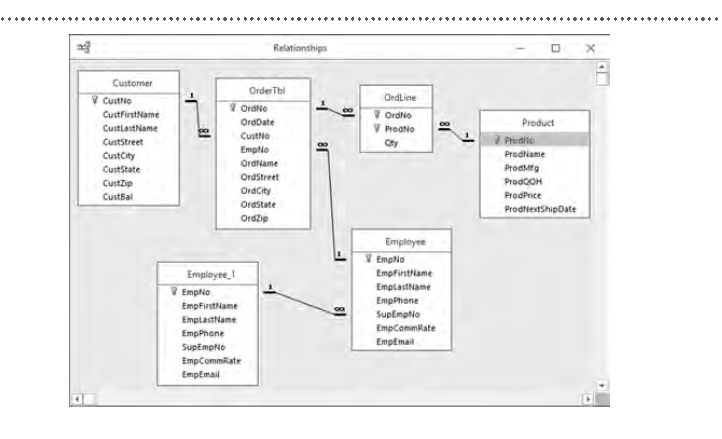

1. Understanding PARTITION BY in SQL
🔹 What PARTITION BY Does

.The PARTITION BY clause is used in SQL with the OVER clause in window functions. It divides the result set into partitions (or groups) based on one or more columns, allowing the window function to operate within each partition independently.

Unlike GROUP BY, which aggregates data into a single row per group, PARTITION BY keeps all rows and computes the window function (e.g., ROW_NUMBER(), RANK(), SUM(), AVG()) for each row within its partition.
For example, if you use PARTITION BY with a column like OrdNo, the window function will reset its calculation for each unique value of OrdNo, treating each Order as a separate partition.

Example:

In [ ]:
#0. Number of Ordered Item per Order
txt='''
SELECT
    OrdNo,Qty,ProdNo,
    COUNT(OrdNo) OVER (PARTITION BY OrdNo) AS NoofOrderedItem
FROM OrdLine;
'''
Q0 =  psql.sqldf(txt)
Q0

OrdNo  Qty    ProdNo  NoofOrderedItem
0   O1116324    1  P1445671                1
1   O1231231    1  P0036566                2
2   O1231231    1  P1445671                2
3   O1241518    1  P0036577                1
4   O1455122    1  P4200344                1
5   O1579999    1  P1556678                3
6   O1579999    1  P6677900                3
7   O1579999    1  P9995676                3
8   O1615141    1  P0036566                3
9   O1615141    1  P1445671                3
10  O1615141    1  P4200344                3
11  O1656777    1  P1445671                2
12  O1656777    1  P1556678                2
13  O2233457    1  P0036577                2
14  O2233457    1  P1445671                2
15  O2334661    1  P0036566                3
16  O2334661    1  P1412138                3
17  O2334661    1  P1556678                3
18  O3252629    1  P4200344                2
19  O3252629    1  P9995676                2
20  O3331222    1  P1412138                3
21  O3331222    1  P1556678                3
22  O3331222    1  P3455443                3
23  O3377543    1  P1445671                2
24  O3377543    1  P9995676                2
25  O4714645    1  P0036566                2
26  O4714645    1  P9995676                2
27  O5511365    1  P1412138                5
28  O5511365    1  P1445671                5
29  O5511365    1  P1556678                5
30  O5511365    1  P3455443                5
31  O5511365    1  P6677900                5
32  O6565656   10  P0036566                1
33  O7847172    1  P1556678                2
34  O7847172    1  P6677900                2
35  O7959898    5  P1412138                4
36  O7959898    5  P1556678                4
37  O7959898    5  P3455443                4
38  O7959898    5  P6677900                4
39  O7989497    2  P1114590                3
40  O7989497    2  P1412138                3
41  O7989497    3  P1445671                3
42  O8979495    1  P1114590                3
43  O8979495    1  P1412138                3
44  O8979495    1  P1445671                3
45  O9919699    1  P0036577                3
46  O9919699    1  P1114590                3
47  O9919699    1  P4200344                3

In [ ]:
#1. Total Orders per Customer
txt='''
SELECT
    CustNo,
    OrdNo,
    COUNT(OrdNo) OVER (PARTITION BY CustNo) AS TotalOrdersByCustomer
FROM OrderTbl;

'''
Q1 =  psql.sqldf(txt)
Q1

CustNo     OrdNo  TotalOrdersByCustomer
0   C0954327  O1116324                      2
1   C0954327  O2334661                      2
2   C1010398  O3331222                      1
3   C2388597  O2233457                      2
4   C2388597  O4714645                      2
5   C3340959  O5511365                      1
6   C3499503  O7989497                      1
7   C8543321  O1656777                      2
8   C8543321  O7959898                      2
9   C8574932  O1455122                      1
10  C8654390  O1615141                      1
11  C9128574  O3377543                      1
12  C9403348  O3252629                      1
13  C9432910  O1231231                      1
14  C9543029  O1579999                      1
15  C9549302  O1241518                      1
16  C9857432  O9919699                      1
17  C9865874  O6565656                      2
18  C9865874  O8979495                      2
19  C9943201  O7847172                      1

In [ ]:
#2. Total Quantity per Product
txt='''
SELECT
    ProdNo,
    OrdNo,Qty,
    SUM(Qty) OVER (PARTITION BY ProdNo) AS TotalQtyPerProduct
FROM OrdLine;

'''
Q2=  psql.sqldf(txt)
Q2

ProdNo     OrdNo  Qty  TotalQtyPerProduct
0   P0036566  O1231231    1                  14
1   P0036566  O1615141    1                  14
2   P0036566  O2334661    1                  14
3   P0036566  O4714645    1                  14
4   P0036566  O6565656   10                  14
5   P0036577  O1241518    1                   3
6   P0036577  O2233457    1                   3
7   P0036577  O9919699    1                   3
8   P1114590  O7989497    2                   4
9   P1114590  O8979495    1                   4
10  P1114590  O9919699    1                   4
11  P1412138  O2334661    1                  11
12  P1412138  O3331222    1                  11
13  P1412138  O5511365    1                  11
14  P1412138  O7959898    5                  11
15  P1412138  O7989497    2                  11
16  P1412138  O8979495    1                  11
17  P1445671  O1116324    1                  11
18  P1445671  O1231231    1                  11
19  P1445671  O1615141    1                  11
20  P1445671  O1656777    1                  11
21  P1445671  O2233457    1                  11
22  P1445671  O3377543    1                  11
23  P1445671  O5511365    1                  11
24  P1445671  O7989497    3                  11
25  P1445671  O8979495    1                  11
26  P1556678  O1579999    1                  11
27  P1556678  O1656777    1                  11
28  P1556678  O2334661    1                  11
29  P1556678  O3331222    1                  11
30  P1556678  O5511365    1                  11
31  P1556678  O7847172    1                  11
32  P1556678  O7959898    5                  11
33  P3455443  O3331222    1                   7
34  P3455443  O5511365    1                   7
35  P3455443  O7959898    5                   7
36  P4200344  O1455122    1                   4
37  P4200344  O1615141    1                   4
38  P4200344  O3252629    1                   4
39  P4200344  O9919699    1                   4
40  P6677900  O1579999    1                   8
41  P6677900  O5511365    1                   8
42  P6677900  O7847172    1                   8
43  P6677900  O7959898    5                   8
44  P9995676  O1579999    1                   4
45  P9995676  O3252629    1                   4
46  P9995676  O3377543    1                   4
47  P9995676  O4714645    1                   4

In [ ]:
#3. Rank Products by Quantity within Each Order
txt='''
SELECT
    OrdNo,
    ProdNo,
    Qty,
    RANK() OVER (PARTITION BY OrdNo ORDER BY Qty DESC) AS ProductRank
FROM OrdLine;

'''
Q3 =  psql.sqldf(txt)
Q3

In [ ]:
#3. Rank Orders by OrderDate Within Each City
txt='''
SELECT
    o.OrdCity,
    o.OrdDate,
    RANK() OVER (PARTITION BY o.OrdCity ORDER BY o.OrdDate) AS OrderRank
FROM OrderTbl o;

'''
Q3 =  psql.sqldf(txt)
Q3


OrdCity                     OrdDate  OrderRank
0     Bellevue  2017-01-23 00:00:00.000000          1
1       Denver  2017-01-13 00:00:00.000000          1
2       Denver  2017-01-15 00:00:00.000000          2
3   Des Moines  2017-01-05 00:00:00.000000          1
4    Englewood  2017-01-23 00:00:00.000000          1
5         Fife  2017-01-23 00:00:00.000000          1
6    Littleton  2017-01-23 00:00:00.000000          1
7     Lynnwood  2017-02-10 00:00:00.000000          1
8       Monroe  2017-01-16 00:00:00.000000          1
9       Renton  2017-01-20 00:00:00.000000          1
10      Renton  2017-01-23 00:00:00.000000          2
11      Renton  2017-02-11 00:00:00.000000          3
12      Renton  2017-02-19 00:00:00.000000          4
13     Seattle  2017-01-09 00:00:00.000000          1
14     Seattle  2017-01-11 00:00:00.000000          2
15     Seattle  2017-01-12 00:00:00.000000          3
16     Seattle  2017-01-14 00:00:00.000000          4
17     Seattle  2017-01-22 00:00:00.000000          5
18     Seattle  2017-01-23 00:00:00.000000          6
19     Seattle  2017-02-11 00:00:00.000000          7

In [ ]:
#4. List all columns of the OrderTbl table and customer first name and last name
txt='''
SELECT
    CustNo,
    O.OrdNo,
    SUM(Qty * P.ProdPrice) AS OrderValue,
    AVG(SUM(Qty * P.ProdPrice)) OVER (PARTITION BY CustNo) AS AvgOrderValuePerCustomer
FROM OrdLine O
JOIN Product P ON O.ProdNo = P.ProdNo
JOIN OrderTbl OT ON OT.OrdNo = O.OrdNo
GROUP BY CustNo, O.OrdNo;

'''
Q4 =  psql.sqldf(txt)
Q4

In [ ]:
#5. Running Total of Sales per Employee
txt='''
SELECT
    EmpNo,
    OrdDate,
    SUM(Qty * P.ProdPrice) OVER (PARTITION BY EmpNo ORDER BY OrdDate) AS RunningSales
FROM OrderTbl OT
JOIN OrdLine OL ON OT.OrdNo = OL.OrdNo
JOIN Product P ON OL.ProdNo = P.ProdNo;

'''
Q5 =  psql.sqldf(txt)
Q5

In [ ]:
#6. Calculate Employee’s Share of Total Sales
txt='''
SELECT
    EmpNo,
    SUM(Qty * P.ProdPrice) AS EmployeeSales,
    SUM(SUM(Qty * P.ProdPrice)) OVER () AS TotalSales,
    ROUND(
        SUM(Qty * P.ProdPrice) * 100.0 / SUM(SUM(Qty * P.ProdPrice)) OVER (),
        2
    ) AS PercentOfTotal
FROM OrderTbl OT
JOIN OrdLine OL ON OT.OrdNo = OL.OrdNo
JOIN Product P ON OL.ProdNo = P.ProdNo
GROUP BY EmpNo
Order By PercentOfTotal DESC
'''
Q5 =  psql.sqldf(txt)
Q5

EmpNo  EmployeeSales  TotalSales  PercentOfTotal
0  E8843211        1793.99     9132.37           19.64
1  E9954302        1690.97     9132.37           18.52
2  E9345771        1666.96     9132.37           18.25
3  E8544399        1486.11     9132.37           16.27
4      None        1432.67     9132.37           15.69
5  E1329594         538.00     9132.37            5.89
6  E9884325         523.67     9132.37            5.73

In [ ]:
#7. Find the Highest Order Value per Customer
txt='''
SELECT
    CustNo,
    OT.OrdNo,
    SUM(Qty * P.ProdPrice) AS OrderValue,
    MAX(SUM(Qty * P.ProdPrice)) OVER (PARTITION BY CustNo) AS MaxOrderValue
FROM OrdLine OL
JOIN Product P ON OL.ProdNo = P.ProdNo
JOIN OrderTbl OT ON OT.OrdNo = OL.OrdNo
GROUP BY CustNo, OT.OrdNo
ORDER BY CustNo;

'''
Q7 =  psql.sqldf(txt)
Q7

CustNo     OrdNo  OrderValue  MaxOrderValue
0   C0954327  O1116324       14.99         280.00
1   C0954327  O2334661      280.00         280.00
2   C1010398  O3331222      149.00         149.00
3   C2388597  O2233457      333.99         333.99
4   C2388597  O4714645      258.00         333.99
5   C3340959  O5511365      189.68         189.68
6   C3499503  O7989497     1466.97        1466.97
7   C8543321  O1656777      113.99         873.45
8   C8543321  O7959898      873.45         873.45
9   C8574932  O1455122      199.99         199.99
10  C8654390  O1615141      383.98         383.98
11  C9128574  O3377543      103.99         103.99
12  C9403348  O3252629      288.99         288.99
13  C9432910  O1231231      183.99         183.99
14  C9543029  O1579999      213.69         213.69
15  C9549302  O1241518      319.00         319.00
16  C9857432  O9919699     1217.99        1217.99
17  C9865874  O6565656     1690.00        1690.00
18  C9865874  O8979495      725.99        1690.00
19  C9943201  O7847172      124.69         124.69

In [ ]:
#8. LIdentify Top-Selling Product per Employee
txt='''
SELECT
    EmpNo,
    ProdNo,
    SUM(Qty) AS TotalQty,
    RANK() OVER (PARTITION BY EmpNo ORDER BY SUM(Qty) DESC) AS ProductRank
FROM OrderTbl OT
JOIN OrdLine OL ON OT.OrdNo = OL.OrdNo
GROUP BY EmpNo, ProdNo;

'''
Q8 =  psql.sqldf(txt)
Q8

Common Table Expression

In [10]:
#8. Find total sales for each employee
txt='''
WITH SalesCTE AS (
    SELECT
        OL.OrdNo,
        sum(OL.Qty * P.ProdPrice) AS SaleAmount
    FROM OrdLine OL
    JOIN Product P ON OL.ProdNo = P.ProdNo
    Group By OL.OrdNo
)
SELECT EmpNo, SUM(SaleAmount) AS TotalSales
FROM OrderTbl OT join SalesCTE SC on OT.OrdNo = SC.OrdNo
Group By EmpNo;


'''
Q8 =  psql.sqldf(txt)
Q8




EmpNo  TotalSales
0      None     1432.67
1  E1329594      538.00
2  E8544399     1486.11
3  E8843211     1793.99
4  E9345771     1666.96
5  E9884325      523.67
6  E9954302     1690.97

In [11]:
#8. Find total sales for each month


txt='''
WITH SalesCTE AS (
    SELECT
        OL.OrdNo,
        sum(OL.Qty * P.ProdPrice) AS SaleAmount
    FROM OrdLine OL
    JOIN Product P ON OL.ProdNo = P.ProdNo
    Group By OL.OrdNo
)
SELECT strftime('%m', date(OrdDate)), strftime('%Y', date(OrdDate)),SUM(SaleAmount) AS TotalSales
FROM OrderTbl OT join SalesCTE SC on OT.OrdNo = SC.OrdNo
Group By strftime('%m', date(OrdDate)), strftime('%Y', date(OrdDate))


'''
Q8 =  psql.sqldf(txt)
Q8




strftime('%m', date(OrdDate)) strftime('%Y', date(OrdDate))  TotalSales
0                            01                          2017     6607.94
1                            02                          2017     2524.43